# Explore Datasets
Download, load and inspect the `CIFAR10`, `CIFAR100`, `MNIST`, ... datasets used in this project.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# enable us to import from parent directory
import sys
sys.path.append('../')

from data.data import download_datasets, get_dataloader, \
    get_label_map

DATA_ROOT = '../data/'

In [2]:
# Setup device
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
kwargs = {'num_workers': 4, 'pin_memory': True} if cuda else {}

In [3]:
# Initialize config dict
config = {
    'batch_size': 8,
    'image_size': 32,
}

Download the datasets used in this project

In [4]:
download_datasets(data_root=DATA_ROOT)

Files already downloaded and verified
Files already downloaded and verified
Downloadning MNIST
Finished downloading CIFAR10, CIFAR100 & MNIST...


In [ ]:
# from torchvision.datasets import CelebA
# _ = CelebA(root=DATA_ROOT, download=True)

Define a function to display a batch of images.

In [5]:
def display_image_batch(loader, label_map=None):
    # Get a batch of images
    image_batch, y_batch = next(iter(loader))

    # transform classes to labels
    if label_map:
        labels = [label_map[y] for y in y_batch]
    else:
        labels = y_batch.numpy()

    # Display the images in the batch
    f, ax = plt.subplots(2, 4, figsize=(10, 6))
    for i in range(image_batch.shape[0]):
        i_, j_ = int(i/4), i%4
        ax[i_, j_].imshow(np.moveaxis(image_batch[i].numpy(), 0, -1))
        ax[i_, j_].axis('off')
        ax[i_, j_].set_title(labels[i])
    plt.show()

Load and inspect the `CIFAR10` dataset

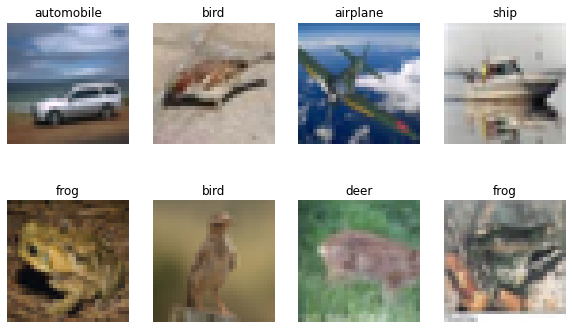

In [6]:
# Adapt config to cifar10
config['dataset'] = 'cifar10'

# Get DataLoader and label map
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
label_map = get_label_map(config['dataset'])

display_image_batch(loader, label_map)

Load and inspect the `CIFAR100` dataset

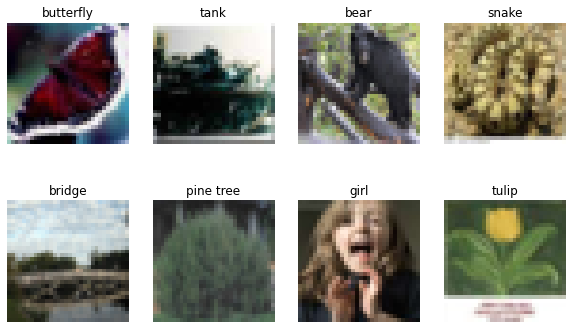

In [9]:
# Adapt config to cifar100
config['dataset'] = 'cifar100'

# Get DataLoader and label map
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
label_map = get_label_map(config['dataset'])

display_image_batch(loader, label_map)

Load and inspect the `MNIST` dataset

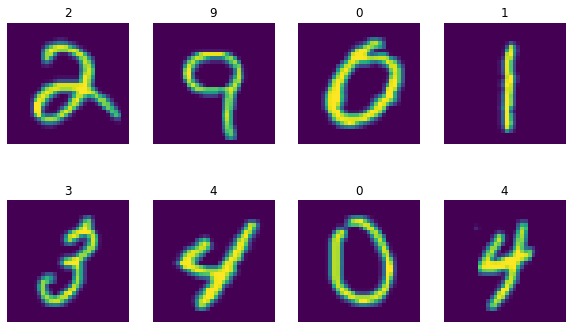

In [8]:
# Adapt config to mnist
config['dataset'] = 'mnist'

# Get DataLoader and visualize batch
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
display_image_batch(loader, None)

Load and inspect the `tower` dataset from LSUN

In [ ]:
# Adapt config to LSUN Tower
config['dataset'] = 'lsun_tower'

# Get DataLoader and visualize a batch
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
display_image_batch(loader, None)

In [ ]:
# Adapt config to LSUN Tower
config['dataset'] = 'lsun_church_outdoor'

# Get DataLoader and visualize a batch
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
display_image_batch(loader, None)

Load and inspect the `ImageNet` dataset (resized to 32x32)

In [ ]:
# Adapt config to ImageNet
config['dataset'] = 'imagenet'

# Get DataLoader and label map
loader, _ = get_dataloader(config, data_root=DATA_ROOT)
label_map = get_label_map(config['dataset'])

# Get a batch of images
image_batch, y_batch = next(iter(loader))

# transform classes to labels
if label_map:
    labels = [label_map[y] for y in y_batch]
else:
    labels = y_batch

# Display the images in the batch
f, ax = plt.subplots(2, 4, figsize=(10, 6))
for i in range(image_batch.shape[0]):
    i_, j_ = int(i/4), i%4
    ax[i_, j_].imshow(np.moveaxis(image_batch[i].numpy(), 0, -1))
    ax[i_, j_].axis('off')
    ax[i_, j_].set_title(labels[i])
plt.show()